#### 載入模組

In [2]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np
#FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
#CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
#For data preprocessing
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

#### 載入資料MNIST

In [3]:
# Load Fashine MNIST
(X_train, y_train0), (X_test, y_test0) = fashion_mnist.load_data()
# Reshape size
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()
# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

#### 神經網路示意圖

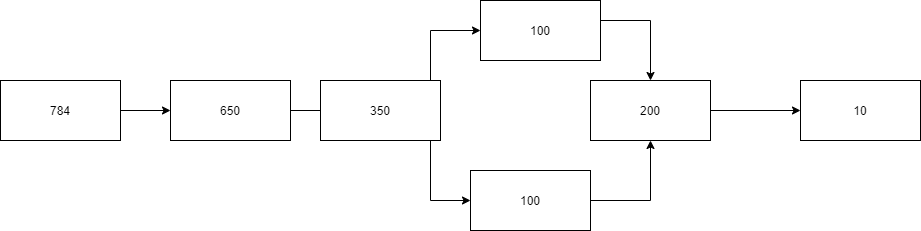

In [4]:
from IPython.display import Image
Image(filename= "Untitled Diagram (1).png")

#### 建構模型

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
x = Input(shape=(784,))

f_1 = Dense(650, activation='sigmoid')
f_2 = Dense(350, activation='relu')
f_3 = Dense(100, activation='sigmoid')
f_4 = Dense(100, activation='relu')
f_5 = Dense(10, activation='softmax')

In [6]:
from tensorflow.keras.layers import concatenate, add
h_1 = f_1(x)
h_2 = f_2(h_1)
h_3 = f_3(h_2)
h_4 = f_4(h_2)
z = concatenate([h_3, h_4])
y = f_5(z)

#### 檢視

In [7]:
model = Model(x, y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 650)          510250      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 350)          227850      dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          35100       dense_1[0][0]                    
______________________________________________________________________________________________

In [8]:
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

#### 訓練

In [9]:
model.fit(X_train, y_train, 
          batch_size = 650, 
          epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0405 - accuracy: 0.7002
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0249 - accuracy: 0.8260
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0220 - accuracy: 0.8466
Epoch 4/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0205 - accuracy: 0.8582
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0197 - accuracy: 0.8636
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0189 - accuracy: 0.8691
Epoch 7/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0183 - accuracy: 0.8743
Epoch 8/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0178 - accuracy: 0.8776
Epoch 9/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0171 - accuracy: 0.8827
Epoch 10/10
60

#### 準確率

In [10]:
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 1s 24us/sample - loss: 0.0170 - accuracy: 0.8843
Loss: 0.017014990250269573
準確率: 88.43166828155518
